# Object detection in the "wild"

A good application in quality management is classifying and counting objects.

In [259]:
# Import OpenCV
import cv2
# Since OpenCV is based on numpy:
import numpy as np
# Import pyplot (we will need this to plot with the notebook)
import matplotlib.pyplot as plt
# Helper function to provide plots in true colors in the notebook
def imshow(title, im):
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.title(title)

## Aufgabenstellung

Diesmal geht es um Smarties:

![Smarties](Smarties0.png)

1. Findet und zählt die roten Smarties in den Bildern.

    - Dieses Beispiel ist gut in Anlehnung an die Sh2-Tafeln im Beispiel lösbar.

1. Challenge: zählt große und kleine Smarties (habe ich bisher selbst nicht gelöst...).

    - Hier könnte "HoughCircles" helfen.

1. Challenge 2: Zählt, wie viele Smarties jeweils weggenommen werden.

    - Für Veränderungen ist es hilfreich, Bilder zu subtrahieren.

Dokumentiert eure Lösungen wie gewohnt in einem Jupyter Notebook.


Text(0.5, 1.0, 'Red')

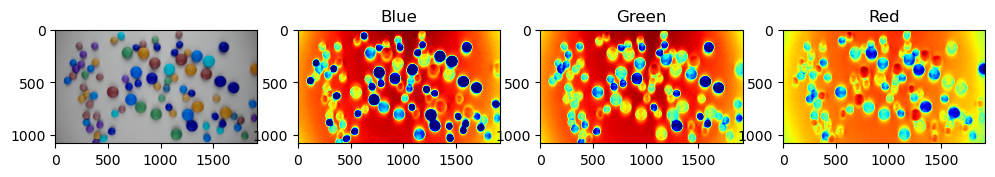

In [260]:
im = cv2.imread('smarties1.png')
plt.figure(figsize = (12,25))
plt.subplot(141)
plt.imshow(im)
plt.subplot(142)
plt.imshow(im[:,:,0], cmap = 'jet')
plt.title('Blue')
plt.subplot(143)
plt.imshow(im[:,:,1], cmap = 'jet')
plt.title('Green')
plt.subplot(144)
plt.imshow(im[:,:,2], cmap = 'jet')
plt.title('Red')

Meine Lösungen sehen bisher so aus:

![Detected Smarties](DetectedSmarties0.png)
![Detected Smarties](DetectedSmarties1.png)
![Detected Smarties](DetectedSmarties2.png)
![Detected Smarties](DetectedSmarties3.png)
![Detected Smarties](DetectedSmarties4.png)
![Detected Smarties](DetectedSmarties5.png)
![Detected Smarties](DetectedSmarties6.png)
![Detected Smarties](DetectedSmarties7.png)
